# Starbucks Nutrition Facts

We try to see the relationship between nutrition facts of starbucks menu. Specifically, we want to investigate calories, fat, caffiene and cholestrol content

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

import warnings

In [2]:
sb_full_menu = pd.read_csv('starbucks_drinkMenu_expanded.csv')
sb_drink_menu = pd.read_csv('starbucks-menu-nutrition-drinks.csv')
sb_food_menu = pd.read_csv('starbucks-menu-nutrition-food.csv', encoding='utf-16')

In [3]:
sb_drink_menu.set_index('Unnamed: 0', inplace=True)
sb_food_menu.set_index('Unnamed: 0', inplace=True)

In [4]:
# Here we simplify the names of the columns of sb_full_menu
sb_full_menu = sb_full_menu.rename(columns={' Total Fat (g)': 'Total Fat', 'Trans Fat (g) ': 'Trans Fat',
                                            'Saturated Fat (g)': 'Saturated Fat', ' Sodium (mg)': 'Sodium',
                                            ' Total Carbohydrates (g) ': 'Total Carbohydrates',
                                            'Cholesterol (mg)': 'Cholesterol', ' Dietary Fibre (g)': 'Dietary Fibre',
                                            ' Sugars (g)': 'Sugars', ' Protein (g) ': 'Protein',
                                            'Vitamin A (% DV) ': 'Vitamin A (% DV)', ' Calcium (% DV) ': 'Calcium (% DV)',
                                            'Iron (% DV) ': 'Iron (% DV)', 'Caffeine (mg)': 'Caffeine'})

In [5]:
# Add "0." in front
sb_full_menu['Vitamin A (% DV)'] = "0." + sb_full_menu['Vitamin A (% DV)']
sb_full_menu['Vitamin C (% DV)'] = "0." + sb_full_menu['Vitamin C (% DV)']
sb_full_menu['Calcium (% DV)'] = "0." + sb_full_menu['Calcium (% DV)']
sb_full_menu['Iron (% DV)'] = "0." + sb_full_menu['Iron (% DV)']

In [6]:
# Remove "%" from percent columns
sb_full_menu = sb_full_menu.replace({'Vitamin A (% DV)': {'%': ''}, 'Vitamin C (% DV)': {'%': ''},
                                     'Calcium (% DV)': {'%': ''}, 'Iron (% DV)': {'%': ''}}, regex=True)

In [7]:
# 'Iron (% DV)' includes percentages in the form of #.00%, so we will need to do some more work
sb_full_menu = sb_full_menu.replace({'Iron (% DV)': {'.00': ''}}, regex=True)

In [8]:
# Replace troublesome entry
sb_full_menu.loc[237, 'Total Fat'] = '3.2'

In [9]:
# Impute None for "Varies" because we don't know value
sb_full_menu = sb_full_menu.replace({'Caffeine': {'Varies': None, 'varies': None}})

In [10]:
# Now we will convert the columns to a number format using the .to_numeric function
# We use the .apply function to apply .to_numeric to multiple columns
columns_to_change = ['Total Fat', 'Caffeine', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']
sb_full_menu[columns_to_change] = sb_full_menu[columns_to_change].apply(pd.to_numeric)

sb_drink_menu.replace('-', '', regex=True, inplace=True)
columns_to_change = ['Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein', 'Sodium']
sb_drink_menu[columns_to_change] = sb_drink_menu[columns_to_change].apply(pd.to_numeric)

sb_drink_menu.dropna(inplace=True) # Drop NA rows
sb_drink_menu = sb_drink_menu[~sb_drink_menu.index.duplicated()] # Drop rows with duplicate indices

In [11]:
# Iterative Imputation
iter_imputer = IterativeImputer(missing_values=np.nan, max_iter=10, verbose=0, imputation_order='roman', random_state=24)
sb_full_menu_num = sb_full_menu.iloc[:, 3:]
imp_full_menu_num = pd.DataFrame(iter_imputer.fit_transform(sb_full_menu_num))
sb_full_menu.iloc[:, 3:] = imp_full_menu_num

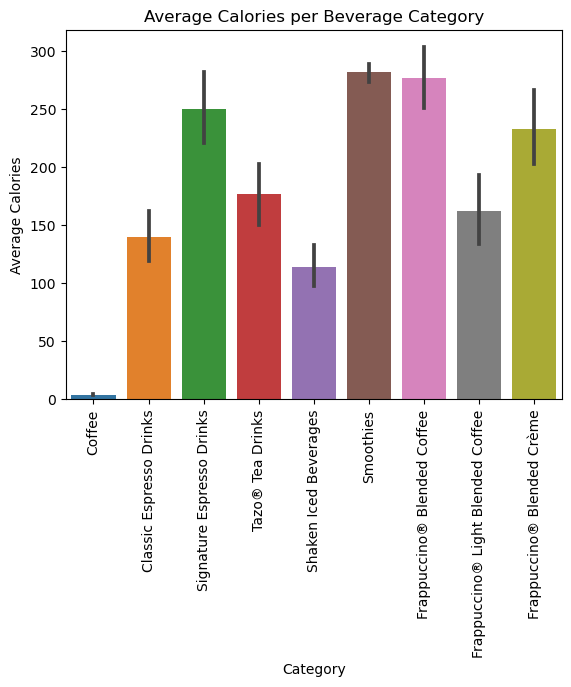

In [12]:
warnings.filterwarnings("ignore", category=FutureWarning)
plot = sns.barplot(y=sb_full_menu['Calories'], x=sb_full_menu['Beverage_category']).set(xlabel='Category', ylabel='Average Calories', title='Average Calories per Beverage Category')
plt.xticks(rotation=90)
plt.show()

Smoothies and frappuccinos have the highest calories.

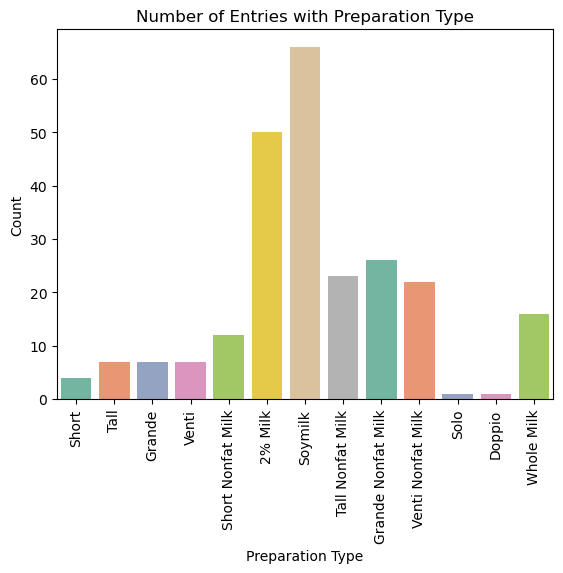

In [13]:
plot = sns.countplot(data=sb_full_menu, x='Beverage_prep', palette="Set2") # Notice the use of the 'palette' attribute here
plot.set(xlabel='Preparation Type', ylabel='Count', title='Number of Entries with Preparation Type')
plt.xticks(rotation=90)
plt.show()

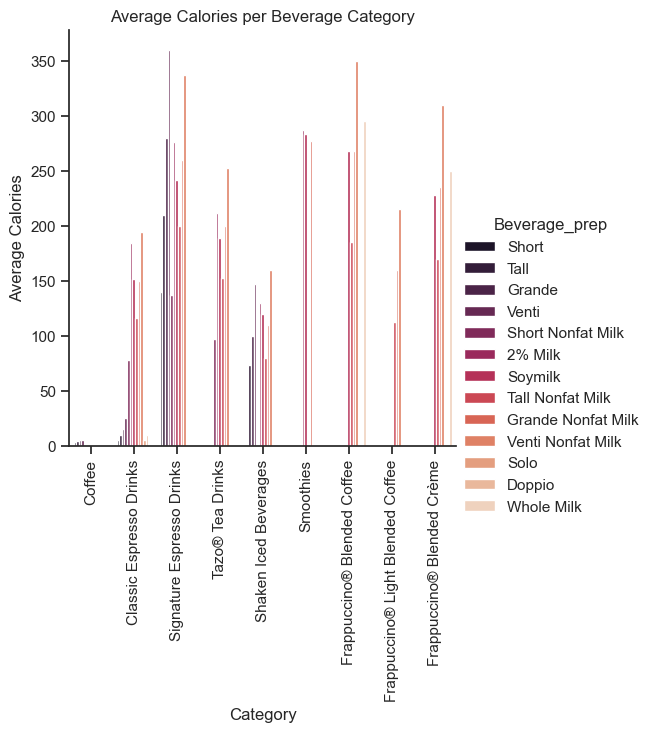

In [14]:
warnings.filterwarnings("ignore", category=UserWarning)
sns.set_theme(style="ticks") # Sets an overall look to the plot
plot = sns.catplot(data=sb_full_menu, kind="bar", x="Beverage_category", y="Calories", hue="Beverage_prep", ci=None, palette="rocket")
plot.set(xlabel='Category', ylabel='Average Calories', title='Average Calories per Beverage Category')
plt.xticks(rotation=90)
plt.show()

The fact that venti driks are higher in calories in each category showed that the size of the drik has direct effect in the amount of calorie of each drink.

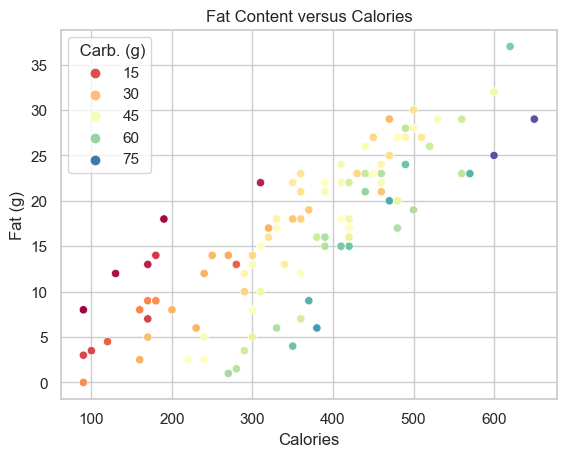

In [15]:
sns.set_theme(style='whitegrid') # Notice we are using a different theme than the graph above
sns.scatterplot(data=sb_food_menu, x=' Calories', y=' Fat (g)', hue=' Carb. (g)', palette='Spectral').set(xlabel='Calories', ylabel='Fat (g)', title='Fat Content versus Calories')
plt.show()

We see as fat content increase calories also increases. 

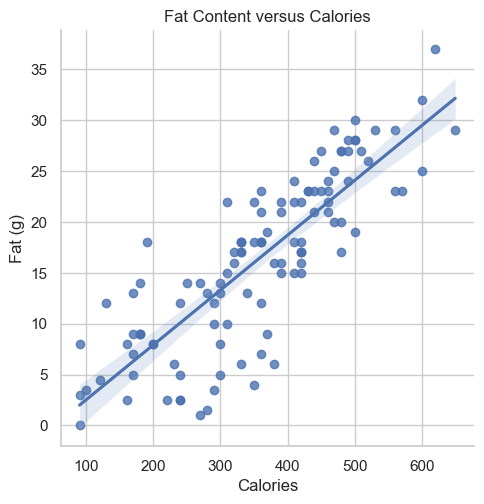

In [16]:
sns.set_theme(style='whitegrid')
sns.lmplot(data=sb_food_menu, x=' Calories', y=' Fat (g)').set(xlabel='Calories', ylabel='Fat (g)', title='Fat Content versus Calories')
plt.show()

We see calores and fat content relationship can be modeled as linear relationship

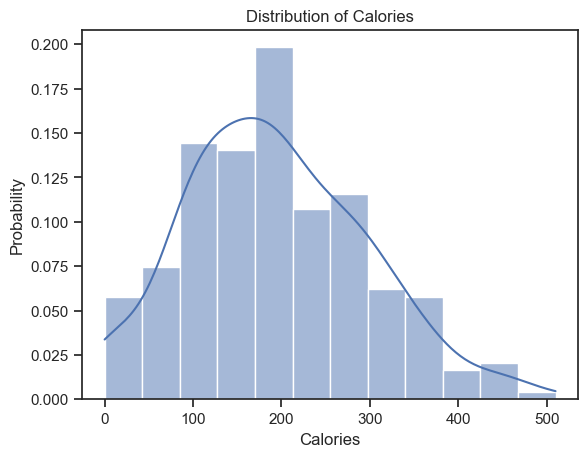

In [17]:
sns.set_theme(style='ticks')
sns.histplot(data=sb_full_menu, x='Calories', kde=True, stat='probability').set(title="Distribution of Calories")
plt.show()

200 calories the most common calories count for the menu items.

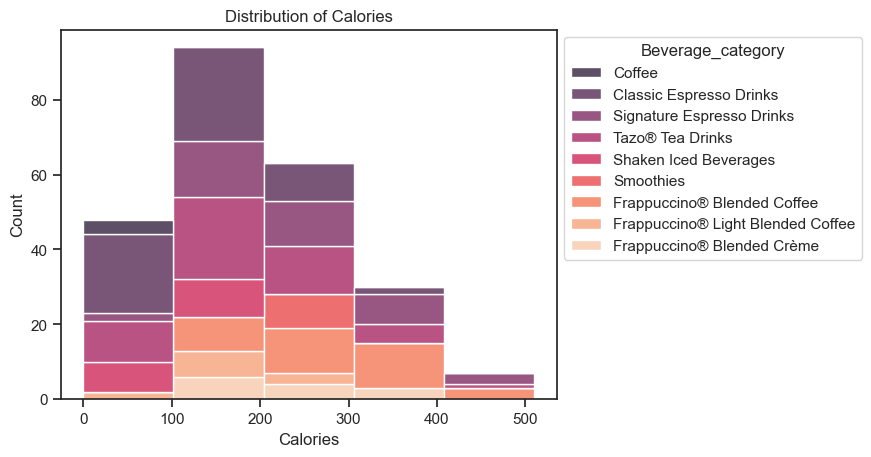

In [18]:
sns.set_theme(style='ticks')
plot = sns.histplot(data=sb_full_menu, x='Calories', hue='Beverage_category', stat='count', multiple='stack', palette='rocket', bins=5)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1)) # Moves legend outside of box
plot.set(title="Distribution of Calories")
plt.show()

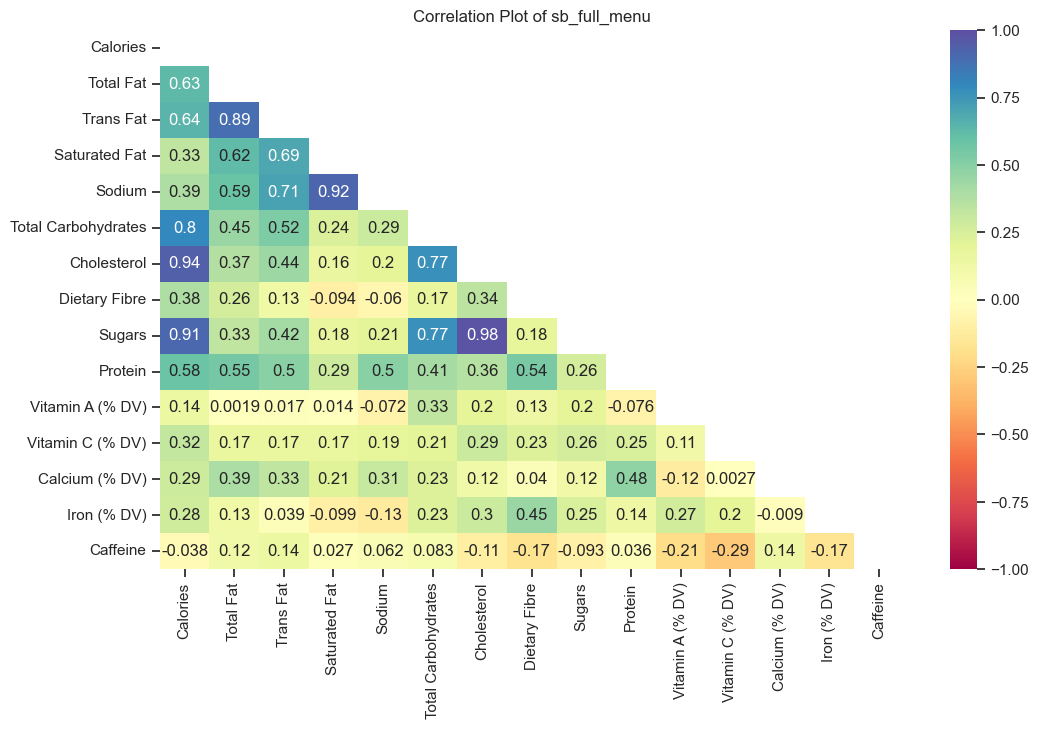

In [24]:
plt.figure(figsize=(12, 7))
numeric_columns = sb_full_menu.select_dtypes(include=np.number)
mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))
corrplot = sns.heatmap(numeric_columns.corr(), vmin=-1, vmax=1, annot=True, mask=mask, cmap='Spectral').set_title("Correlation Plot of sb_full_menu")
plt.show()

sugar and cholestrol shows the stronges correlation. cholestrol and calories also shows very strong correlation

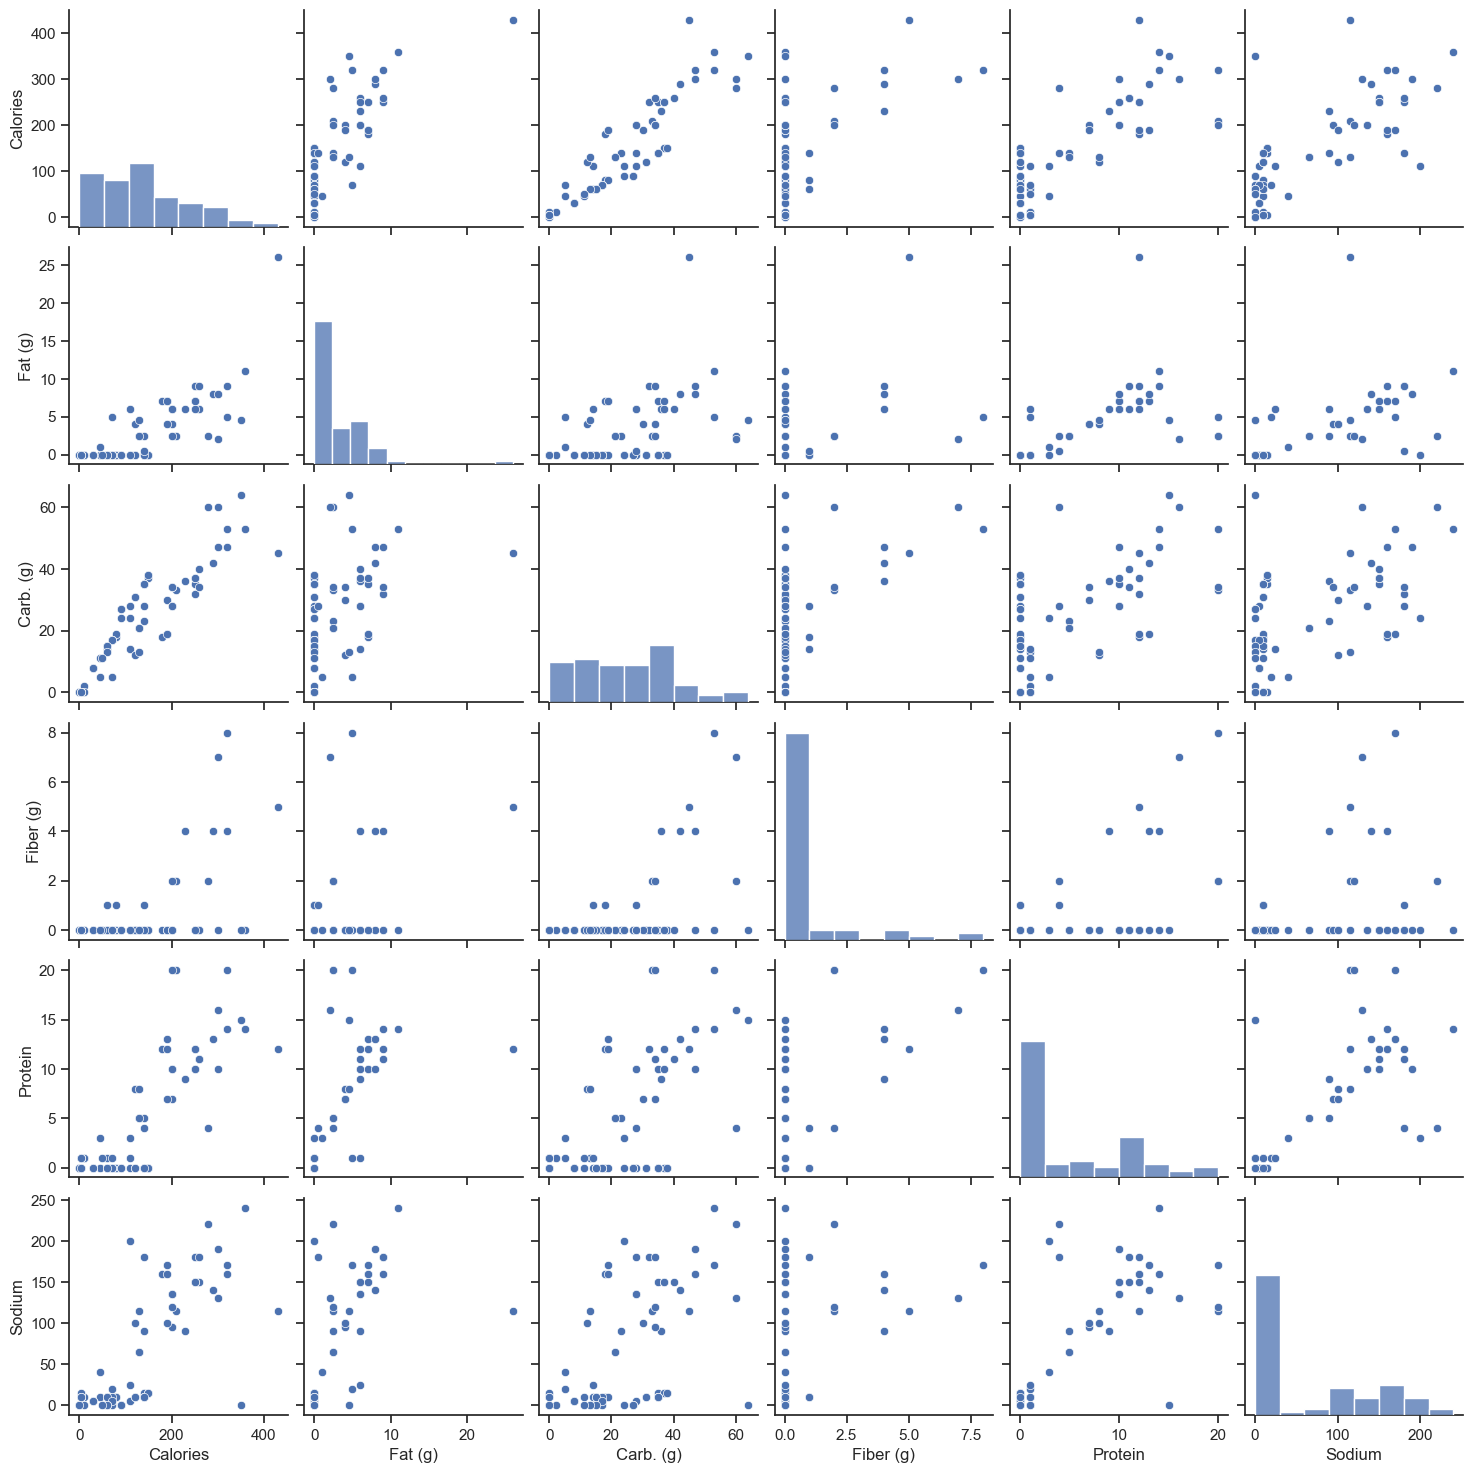

In [25]:
sns.set_theme(style='ticks')
sns.pairplot(data=sb_drink_menu)
plt.show()

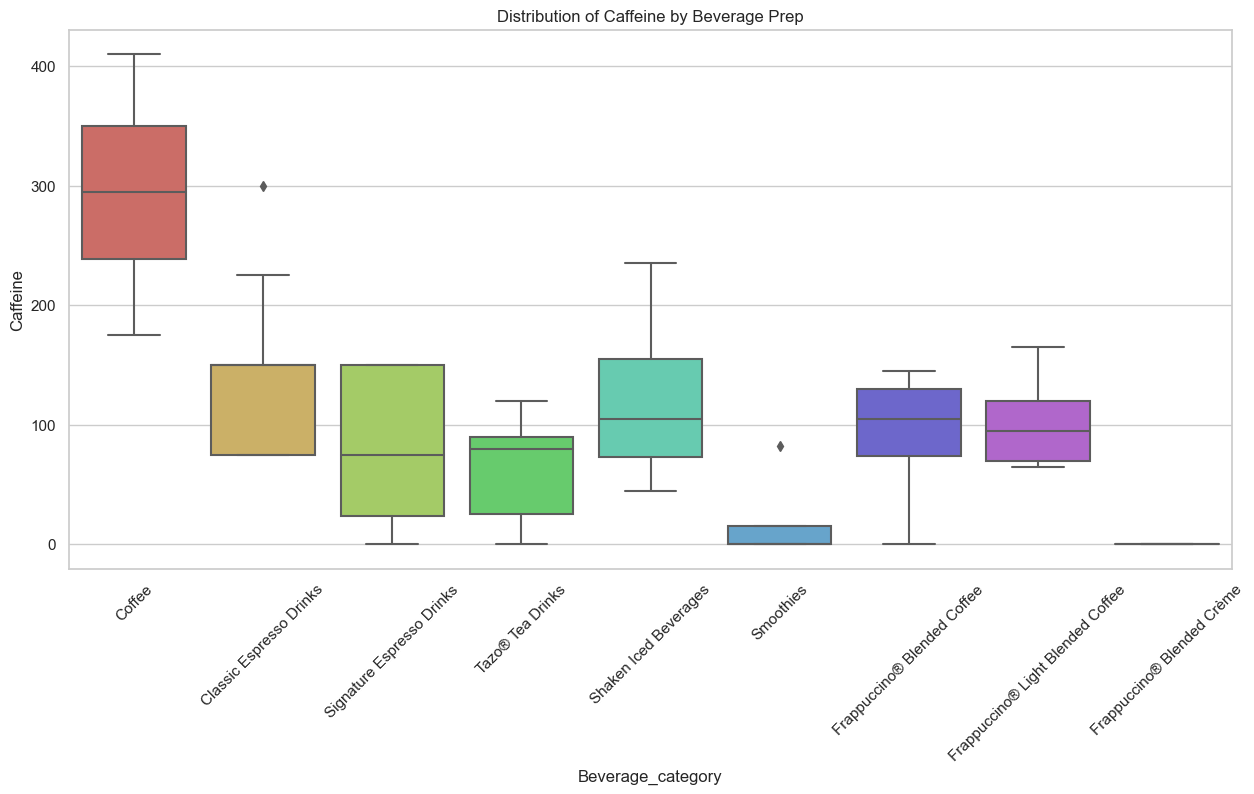

In [27]:
plt.figure(figsize=(15,7))
sns.set_theme(style='whitegrid')
sns.boxplot(data=sb_full_menu, x='Beverage_category', y='Caffeine', palette='hls').set(title='Distribution of Caffeine by Beverage Prep')
plt.xticks(rotation=45)
plt.show()

Normal coffee drinks have the highest amount of caffeine

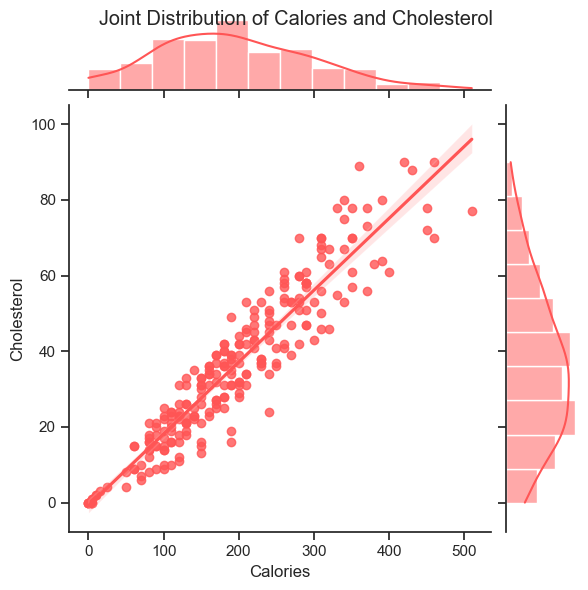

In [28]:
sns.set_theme(style='ticks')
sns.jointplot(data=sb_full_menu, x='Calories', y='Cholesterol', kind='reg', color='#ff5555').fig.suptitle('Joint Distribution of Calories and Cholesterol')
plt.show()

As Cholesterol increases calories also increases. we can also see the distributions of cholesterol and calories 

[Text(0.5, 1.0, 'ECDF of Calories')]

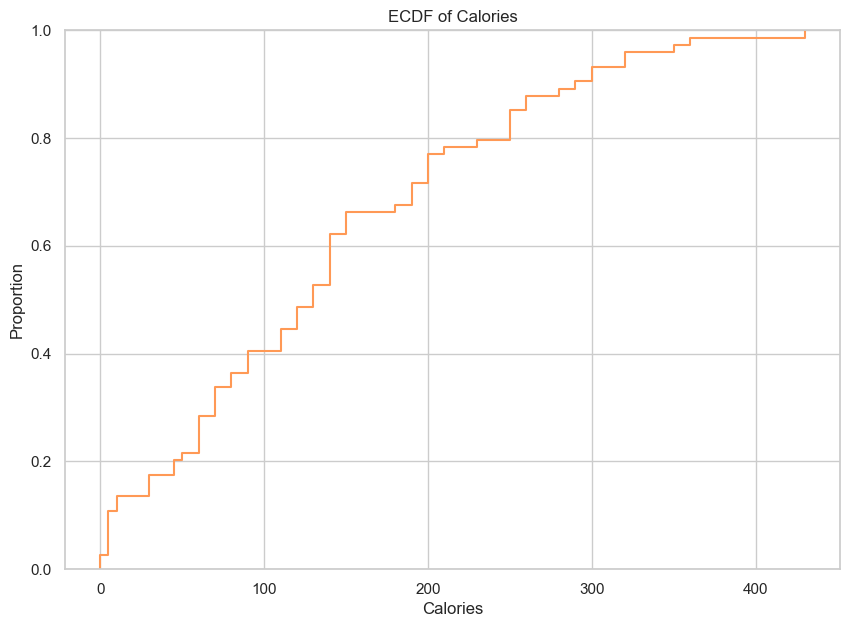

In [29]:
plt.figure(figsize=(10,7))
sns.set_theme(style='whitegrid')
sns.ecdfplot(data=sb_drink_menu, x='Calories', color='#ff9955').set(title='ECDF of Calories')

About 50% the drinks have below 125 to 150 calories.

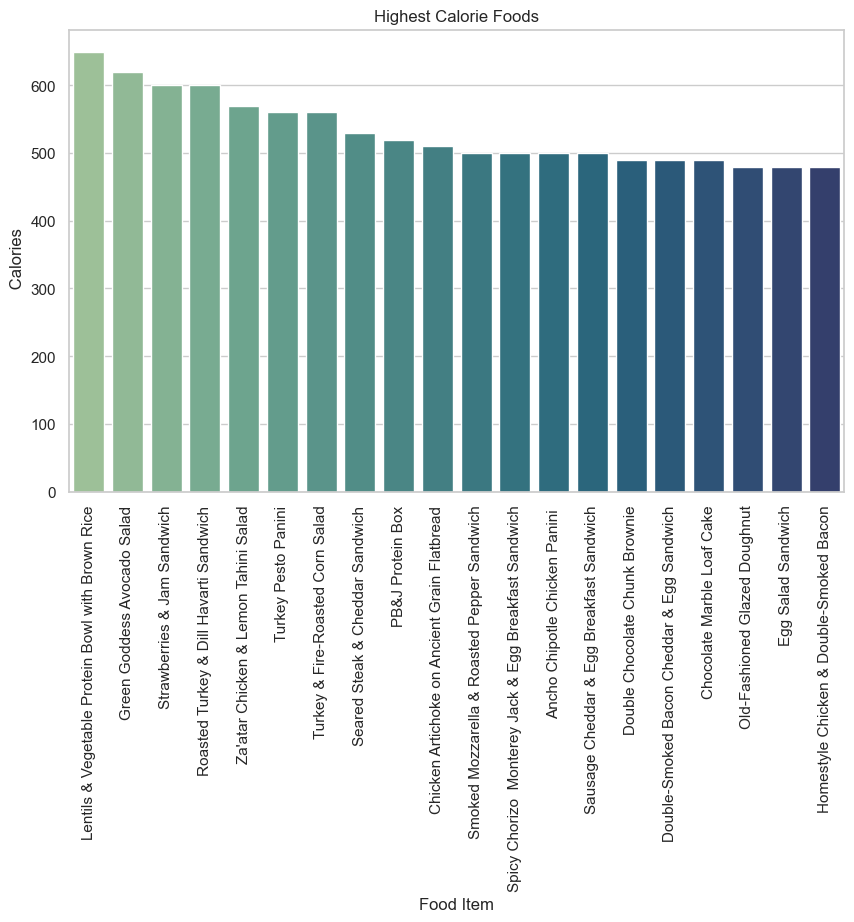

In [35]:
sb_food_menu = pd.read_csv('starbucks-menu-nutrition-food.csv', encoding='utf-16')
top20_cal = sb_food_menu.sort_values(' Calories', ascending=False).head(20)
# We will only look at this top 20 highest caloric foods and we want to sort by calories
plt.figure(figsize=(10, 6))
sns.set_theme(style='whitegrid')
plot = sns.barplot(data=top20_cal, x='Unnamed: 0', y=' Calories', palette='crest')
plot.set(title='Highest Calorie Foods', xlabel='Food Item')
plt.xticks(rotation=90)
plt.show()